In [ ]:
#imporing necessery modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
filePath = '/content/drive/My Drive/Rainfall_Predict/rainfall_india/rainfall in india 1901-2015.csv'
data = pd.read_csv(filePath)
print(data.head())
#print(data.columns)

print("Null values in dataset before preprocessing :")
print(data.isnull().sum())
print("")

print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data :")
print(np.mean(data))
print("")

print("Null values in dataset after preprocessing :")
print(data.isnull().sum())
print("\n\nShape of data: ",data.shape)



                 SUBDIVISION  YEAR   JAN  ...  Mar-May  Jun-Sep  Oct-Dec
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2  ...    560.3   1696.3    980.3
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  ...    458.3   2185.9    716.7
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  ...    236.1   1874.0    690.6
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4  ...    506.9   1977.6    571.0
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3  ...    309.7   1624.9    630.8

[5 rows x 19 columns]
Null values in dataset before preprocessing :
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

Filling null values with mean of that particular column
Mean of data :
YEAR       1958.218659
JAN          18.957320
FEB          21.8053

In [ ]:
print("Understanding the dataset :\n")
print(data.info())
print("")

print("Group data by subdivision:\n")
data.groupby('SUBDIVISION').size()

print("Co-Variance :\n",data.cov())
print("Co-Relation :\n",data.corr())

corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)



Understanding the dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 n

Scatter plot of annual and january attributes


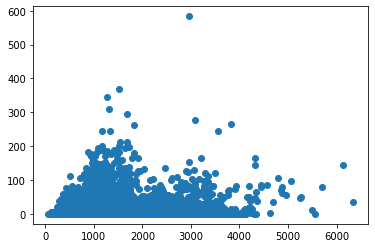

In [ ]:
print("Scatter plot of annual and january attributes")
plt.scatter(data.ANNUAL,data.JAN)

Box Plot of annual rainfall data in years 1901-2015


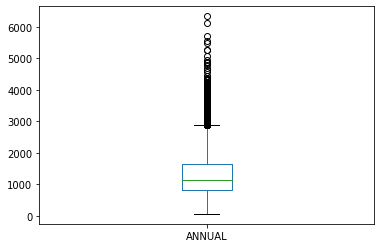

In [ ]:

print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

# New Section

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


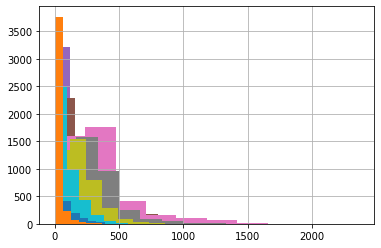

In [ ]:
month = ['JAN' , 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# for i in range(12):
#     print(month[i], "")

print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")

for i in range(12):
    data[month[i]].hist(bins=10)

Histogram showing the annual rainfall of the all states:


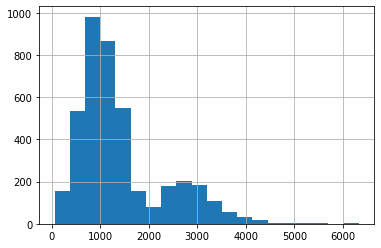

In [ ]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)

Multiple Linear regression model between annual rainfall and the periodic rainfall:
Intercept :  12.201188343547301
coeeficients:
 [0.92765219 0.9740892  0.98846825 1.01416244]
predicted y value :
 [ 818.72918293 1047.16621832 1271.31385053 ...  435.60665911  709.94185334
 1240.17501331]

Test data (input) :
       Jan-Feb  Mar-May  Jun-Sep  Oct-Dec
3452     90.2    125.5    303.2    296.7
1708    295.4    340.2    416.3     17.8
576      25.5    213.5    847.0    187.6
3835      0.1     75.2    890.3    203.7
491       7.4    326.6   2596.9     62.0
...       ...      ...      ...      ...
980      62.5     78.1   1265.8     19.9
3111     32.9    147.1    571.6    471.1
1476     93.3     27.0    303.2     10.7
1158      4.2     20.1    665.1     16.6
2859     19.6     20.7   1191.4     11.8

[1647 rows x 4 columns]
Test data (output):
 3452     815.6
1708    1069.6
576     1273.6
3835    1169.4
491     2992.9
         ...  
980     1426.2
3111    1222.7
1476     434.3
1158     706.0
2

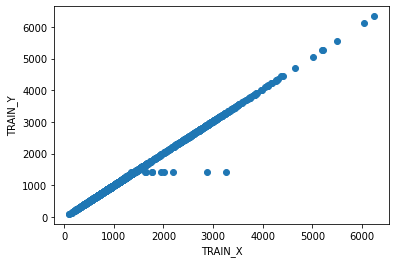

In [ ]:
print("Multiple Linear regression model between annual rainfall and the periodic rainfall:")

model = LinearRegression()
X = data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
Y = data['ANNUAL']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
model.fit(X_train, Y_train)
y_pred= model.predict(X_test)
score = model.score(X_test,Y_test)

print("Intercept : ", model.intercept_)
print("coeeficients:\n", model.coef_)
print("predicted y value :\n", y_pred)
print("")


print("Test data (input) :\n", X_test)
print("Test data (output):\n", Y_test)
#print(score)
print("")

comparison_table = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
# sort comparison_table  ascending order of Y_test
comparison_table.sort_values(by=['Actual'], inplace=True)

print("comparison between actual and predicted Rainfall(mm) (in ascending order) : \n")
print(comparison_table.head(10))
print("")

print(comparison_table.tail(10))
print("")

print("Mean Squared Error =",mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("Mean Absolute Error =",mean_absolute_error(Y_test,y_pred))
print("r2_score =",r2_score(Y_test,y_pred))
print("")
plt.scatter(y_pred ,Y_test)
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()


In [ ]:
d2=data.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'],axis=1)
k=((d2.head().sum()))
month=list(d2.head())
print("Months are: ",month)
print(d2.head())
print(k)

total_rainfall=0
for value in d2.sum():
    total_rainfall = total_rainfall+value

print("Total recorded rainfall in these 12 months",total_rainfall)
#print("")

probability = list(k/total_rainfall)

for i in range(len(probability)):
    print("Ranfall probability in ", month[i], ": " , round(probability[i],6))

max_rainfall=max(probability)

for i in range(len(month)):
    if probability[i]== max_rainfall:
        print("Maximum Rainfall will be in the month of",month[i])

min_rainfall=min(probability)
for i in range(len(month)):
    if probability[i]==min_rainfall:
        print("Minimum Rainfall will be in the month of",month[i])

Months are:  ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    JAN    FEB   MAR    APR    MAY  ...    AUG    SEP    OCT    NOV    DEC
0  49.2   87.1  29.2    2.3  528.8  ...  481.1  332.6  388.5  558.2   33.6
1   0.0  159.8  12.2    0.0  446.1  ...  753.7  666.2  197.2  359.0  160.5
2  12.7  144.0   0.0    1.0  235.1  ...  326.7  339.0  181.2  284.4  225.0
3   9.4   14.7   0.0  202.4  304.5  ...  160.1  820.4  222.2  308.7   40.1
4   1.3    0.0   3.3   26.9  279.5  ...  330.5  297.0  260.7   25.4  344.7

[5 rows x 12 columns]
JAN      72.6
FEB     405.6
MAR      44.7
APR     232.6
MAY    1794.0
JUN    2658.3
JUL    2193.1
AUG    2052.1
SEP    2455.2
OCT    1249.8
NOV    1535.7
DEC     803.9
dtype: float64
Total recorded rainfall in these 12 months 5829542.827152476
Ranfall probability in  JAN :  1.2e-05
Ranfall probability in  FEB :  7e-05
Ranfall probability in  MAR :  8e-06
Ranfall probability in  APR :  4e-05
Ranfall probability in  MAY :  0.00

In [ ]:
from math import sqrt
from math import pi
from math import exp

def Gaussian_Naive_Bayes(x, x_given):
    x_m = sum(x)/len(x)
    print(x_m)
    sigma_sqr = 0;

    for i in range(len(x)):
        sigma_sqr += (x[i] - x_m)**2
    sigma_sqr/=(len(x)-1)
    print(sigma_sqr)

    ans = 1.0/sqrt(2.0*pi*sigma_sqr)*exp(-((x_given-x_m)**2)/(2.0*sigma_sqr))
    return ans

In [ ]:
p1 = Gaussian_Naive_Bayes([15,12,13,6,7,5], 15)
p2 = Gaussian_Naive_Bayes([10,14,16,20], 15)
print(p1, p2, p1+p2)

9.666666666666666
17.46666666666667
15.0
17.333333333333332
0.04228448485961988 0.09582283625320921 0.13810732111282908


In [ ]:
import numpy as np
X = np.array([15,10,12,14,13,16,6,7,5,20])
X = X.reshape(1,-1)
Y = np.array([1, 0, 1, 0, 1, 0, 1,1,1,0])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()
print(clf.predict([15]))

ValueError: ignored

In [ ]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB()
print(clf_pf.predict([[-0.8, -1]]))